In [1]:
print('Hello World')

Hello World


In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [9]:
df=df.iloc[:,1:]

In [10]:
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

In [11]:
import matplotlib.pyplot as plt


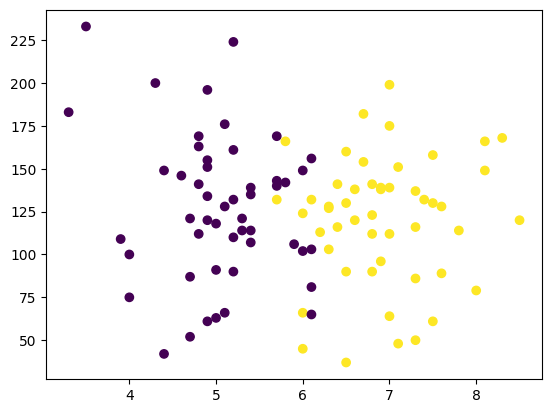

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
X=df.iloc[:,:2]
Y=df.iloc[:,-1]

In [15]:
X

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [16]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [19]:
X_train

cgpa     iq
65   8.1  166.0
68   4.0   75.0
4    5.8  142.0
95   4.3  200.0
35   6.8   90.0
..   ...    ...
25   5.0   91.0
64   7.0   64.0
45   6.0   66.0
87   5.7  132.0
52   7.0  175.0

[90 rows x 2 columns]

In [20]:
X_test

cgpa     iq
46   5.3  114.0
82   6.5   37.0
44   7.5   61.0
48   6.6  138.0
47   5.2  161.0
88   4.4  149.0
54   6.4  141.0
15   5.1  176.0
38   6.5  160.0
24   4.7  121.0

In [21]:
Y_train

65    1
68    0
4     0
95    0
35    1
     ..
25    0
64    1
45    1
87    1
52    1
Name: placement, Length: 90, dtype: int64

In [22]:
Y_test

46    0
82    1
44    1
48    1
47    0
88    0
54    1
15    0
38    1
24    0
Name: placement, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)

In [24]:
X_train

array([[ 1.80983474,  1.08253227],
       [-1.74055877, -1.22630609],
       [-0.18184942,  0.47360787],
       [-1.48077388,  1.94517517],
       [ 0.68410021, -0.84572834],
       [ 0.42431532,  0.16914567],
       [ 0.07793547, -0.51589429],
       [-0.26844439,  1.15864782],
       [ 1.98302467,  1.13327597],
       [ 1.11707503, -0.18606023],
       [-0.52822928,  0.39749232],
       [-0.9612041 ,  0.70195452],
       [-0.70141921,  2.55409958],
       [-0.26844439,  0.42286417],
       [ 0.85729014,  1.91980332],
       [-0.0086595 , -1.98746159],
       [-1.74055877, -0.59200984],
       [ 1.72323978, -1.12481869],
       [-0.9612041 ,  1.84368777],
       [ 1.11707503,  0.34674862],
       [ 0.07793547, -1.07407499],
       [ 1.80983474,  0.65121082],
       [-0.9612041 , -0.08457283],
       [-1.39417891, -2.06357714],
       [ 0.25112539,  0.11840197],
       [ 1.29026496,  0.87955747],
       [-0.9612041 , -1.58151199],
       [ 0.68410021, -0.00845728],
       [ 0.85729014,

In [25]:
X_test = scalar.fit_transform(X_test)

In [26]:
X_test

array([[-0.54403307, -0.27740834],
       [ 0.71142786, -2.08761531],
       [ 1.7576453 , -1.52339496],
       [ 0.8160496 ,  0.28681201],
       [-0.64865481,  0.82752319],
       [-1.48562876,  0.54541301],
       [ 0.60680611,  0.35733956],
       [-0.75327656,  1.18016091],
       [ 0.71142786,  0.804014  ],
       [-1.17176353, -0.11284407]])

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [41]:
y_pred = clf.predict(X_test)

In [42]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [43]:
Y_test

46    0
82    1
44    1
48    1
47    0
88    0
54    1
15    0
38    1
24    0
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score


In [45]:
accuracy_score(Y_test,y_pred)

1.0

<Axes: >

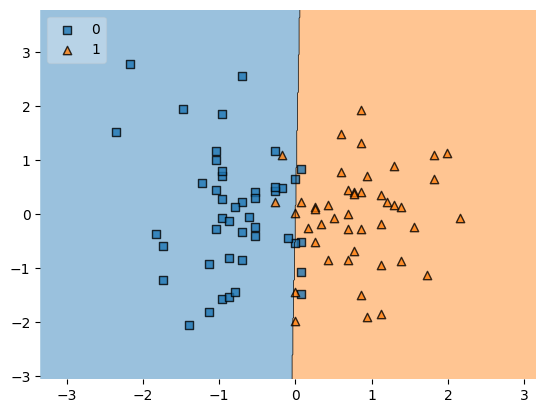

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [47]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))